In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Reviews to Dataframe...
print('Loading reviews...',end='')
df = pd.read_csv('train.csv')
print('[ok]')
print('Loaded {:,} reviews' .format(len(df)))

Loading reviews...[ok]
Loaded 426,340 reviews


In [3]:
df.columns #Deciding on Columns we might need, dropping the rest for now

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [4]:
#We Found relatively Small number of NAN onject in the dataset  in both TEXT and Summary features
#wE will replace with '' and drop the UN-NEEDED columns for now
#Concatinating TEXT and Summary features as per the DR. example. Which is OK as I didnt find obvoius correlation
def dataframe_optimzer(dataframe):
    dataframe.Summary.fillna('', inplace=True)
    dataframe.Text.fillna('', inplace=True)
    dataframe.drop(['Id','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','ProductId'],axis=1,inplace=True)
    #Concatinating TEXT and Summary features as per the DR. example. Which is OK as I didnt find obvoius correlation
    dataframe['text']=dataframe['Summary']+' '+dataframe['Text'] 
    dataframe.drop(['Summary','Text'],axis=1,inplace=True)
    #dataframe['length']=dataframe['text'].str.len() 
    return dataframe


# 1- Data Exploration and Visualization: (10%)
Provide an initial step to inspect, visualize and analyse the different attributes in your data set.
Document your findings and make conclusions for your next steps

In [5]:
df = dataframe_optimzer(df) 

In [6]:
df.columns

Index(['Score', 'text'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E242C5588>]],
      dtype=object)

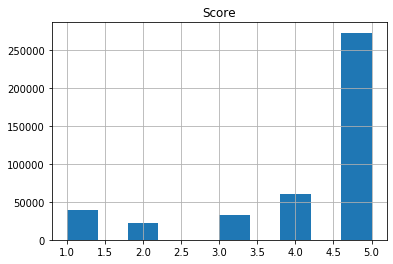

In [7]:
df.hist()
# We need to comment on the graph below, Basically the data is biased towards score 5 . 

In [8]:
df.groupby('Score').describe()

text                                                                
        count  unique                                                top freq
Score                                                                        
1       39193   28530  Filler food is empty, leaves your cat always n...  140
2       22353   16290  Personal preference I had hoped this tea would...   23
3       31993   23302  I'll pass... Not enough flavor, murky brown co...   22
4       60309   43879  Stash Chamomile Herbal Tea Stash Chamomile Her...   30
5      272492  197187  Fantastic Food for Good Cat Health The pet foo...   37

In [9]:
# We can conclude from the table above, that the distributions is not equal, text with ratings 5 are far more than any other score

In [10]:
# We need to write the conclustion for the graph
#ALso feel free to add whatever graph you like so we can visualize the data as much as we can
# DataFrame is called df , you can see its columns by running df.columns for more info run  df.info(), df.describe() ...etc

# 2 - Text Processing and Normalization: (20%)
Thoroughly experiment with different text processing and normalization alternatives. Explain the
trade-off and benefits of using each and justify their effectiveness for the current data set.

"""
NOTE FOR THE TEAM
This question (Question 2) is all about text normalization (tokenization) , this includes
cleaning the text and make it uniform, this is mainly done via removing punctuations, stopword
After our call, I noticed some html tags in the text, we need to remove them as well.
The catch is they MUST be removed before the pre-processing function , the reason is once we use the function, we loose punctuations, 
so <br> looks like br , so we cant really figure out that it was in fact and HTML tag.
SO I will work on creating a fn to clean the html tags first, then pass it to the tokenization function 
"""

"""
Update, I found a libraries that can do that, you need to install 
pip install lxml
pip install beautifulsoup4
Added them to the tokenizer function
"""

In [11]:
# We will use 2 methods to tokeinze the corpse...stemming and Lemmatization , both from NLTK librarry

#Once we finzalie the analysis, we will use CV and TFIDF to vectorize then build the pipeline with either one of them (cant have both in pipline AFAIK)
# (possibly we will use TFIDF)

#UPDATE, we will only remove the html tags and puncations ( we wont test that i believe as this will make the model better)


In [12]:
#Method 1 - Building our own tokenizer (to remove HTML and punc)

In [13]:
import string,lxml,bs4


In [14]:
string.punctuation # we will remove this


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
#This function will remove html tags, punctiaton [Must run in order ]
def tokenizer(text):
    no_html = bs4.BeautifulSoup(text,'lxml').get_text()
    no_punctuation = [char for char in no_html if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return no_punctuation

In [16]:
df_original = df.copy() #Backup to work on raw input data if we will need it later...

#### DATASET REDUCTION

In [17]:
# IMPORTNAT... THIS IS CREATING A SMALLER SUBSET OF DATA, REMOVE THIS LINE TO WORK ON ALL DATA
df = df.head(1000)
print ( 'Original DB size is',len(df_original),' Current db size',len(df))

Original DB size is 426340  Current db size 1000


In [18]:
#df['text'] = df['text'].apply(tokenizer)

### Stemming 

Port Stemmer

In [19]:
df_PS = df.copy()

In [20]:
from nltk.stem import PorterStemmer

In [21]:
nltkstemmer = PorterStemmer()

In [22]:
def stemmer(text):
    review = [nltkstemmer.stem(word) for word in text.split()]
    review = ' '.join(review) 
    return review
    
    

In [23]:
df_PS['text']= df_PS['text'].apply(stemmer)

### Lemmatizing

In [24]:
# decided to go with option v, not n for no obvoius reason except my surface laptop is burning hot :)!

In [25]:
df_LM = df.copy()

In [26]:
from nltk.stem import WordNetLemmatizer

In [27]:
nltklem = WordNetLemmatizer()

In [28]:
def lemmatizer(text):
    review = [nltklem.lemmatize(word,'v') for word in text.lower().split()]
    review = ' '.join(review)
    #print(review)
    return review

In [29]:
df_LM['text'] = df_LM['text'].apply(lemmatizer)

#### Comparison of the 3 datasets 

In [30]:
i=15 #set i to the record you wanna see

In [31]:
df_original['text'].iloc[i]

'BEST CHIPS and GLUTEN FREE! These chips are so good they are addictive!  Extremely fresh and crispy.  Even potato chips can contain gluten, so when I noticed Gluten Free marked on the bag I had to give them a try.  Now these are the only potato chips I will purchase--Thanks for making a GF product that rocks!!'

In [32]:
df['text'].iloc[i] 

'BEST CHIPS and GLUTEN FREE! These chips are so good they are addictive!  Extremely fresh and crispy.  Even potato chips can contain gluten, so when I noticed Gluten Free marked on the bag I had to give them a try.  Now these are the only potato chips I will purchase--Thanks for making a GF product that rocks!!'

In [33]:
df_PS['text'].loc[i]

'best chip and gluten free! these chip are so good they are addictive! extrem fresh and crispy. even potato chip can contain gluten, so when I notic gluten free mark on the bag I had to give them a try. now these are the onli potato chip I will purchase--thank for make a GF product that rocks!!'

In [34]:
df_LM['text'].loc[i]

'best chip and gluten free! these chip be so good they be addictive! extremely fresh and crispy. even potato chip can contain gluten, so when i notice gluten free mark on the bag i have to give them a try. now these be the only potato chip i will purchase--thanks for make a gf product that rocks!!'

### Conclusion 

In [35]:
# Write our conclusion here...!











# Vector space Model and feature representation: (20%)
Experiment with different representation techniques. Document your findings and make
conclusions. Show how choosing n-gram features can influence your results

### CountVictorizer 

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
# Method1 df | CountVectorizer (defualt 'word' analyzer)

# Fitting 
bow_m1 = CountVectorizer().fit(df['text'])
#Transform 
df_small_bow_m1 = bow_m1.transform(df['text'])

In [38]:
# Method2 df | CountVectorizer(our custom analyzer aka Tokenizer)

# Fitting 
bow_m2 = CountVectorizer(analyzer=tokenizer).fit(df['text'])
#Transform 
df_small_bow_m2 = bow_m2.transform(df['text'])

In [39]:
# Method3 df | CountVectorizer(char analyzer)

# Fitting 
bow_m3 = CountVectorizer(analyzer='char').fit(df['text'])
#Transform 
df_small_bow_m3 = bow_m3.transform(df['text'])

In [40]:
# Method4 df | CountVectorizer(stop words )

# Fitting 
bow_m4 = CountVectorizer(stop_words={'english'},analyzer= 'word',ngram_range=(1,2)).fit(df['text'])
#Transform 
df_small_bow_m4 = bow_m4.transform(df['text'])

In [41]:
#findings and Results

In [42]:
print('Method 1 CV')
print('Bag of words CV1',len(bow_m1.vocabulary_))


Method 1 CV
Bag of words CV1 7175


In [43]:
print('Method 2 CV')
print('Bag of words CV2',len(bow_m2.vocabulary_))

Method 2 CV
Bag of words CV2 66


In [44]:
print('Method 3 CV')
print('Bag of words CV3',len(bow_m3.vocabulary_))

Method 3 CV
Bag of words CV3 67


In [45]:
print('Method 4 CV')
print('Bag of words CV4',len(bow_m4.vocabulary_))

Method 4 CV
Bag of words CV4 53569


### TFIDF



In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
BOW_TFIDF1 = TfidfVectorizer(stop_words={'english'},ngram_range=(1,2))
BOW_TFIDF1.fit(df['text'])
BOW_TFIDF1.fit_transform(df['text'])

<1000x53569 sparse matrix of type '<class 'numpy.float64'>'
	with 134992 stored elements in Compressed Sparse Row format>

In [50]:
BOW_TFIDF2 = TfidfVectorizer(analyzer=tokenizer,ngram_range=(1,2))
BOW_TFIDF2.fit(df['text'])
BOW_TFIDF1.fit_transform(df['text'])

C:\Users\tamers\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn("The parameter 'ngram_range' will not be used"


<1000x53569 sparse matrix of type '<class 'numpy.float64'>'
	with 134992 stored elements in Compressed Sparse Row format>

In [51]:
BOW_TFIDF3 = TfidfVectorizer(ngram_range=(1,2),min_df=2)
BOW_TFIDF3.fit(df['text'])
BOW_TFIDF1.fit_transform(df['text'])

<1000x53569 sparse matrix of type '<class 'numpy.float64'>'
	with 134992 stored elements in Compressed Sparse Row format>

In [52]:
print('Method 1 TFIDF')
print('Bag of words TFIDF1',len(BOW_TFIDF1.vocabulary_))

Method 1 TFIDF
Bag of words TFIDF1 53569


In [53]:
print('Method 2 TFIDF')
print('Bag of words TFIDF2',len(BOW_TFIDF2.vocabulary_))

Method 2 TFIDF
Bag of words TFIDF2 66


In [54]:
print('Method 3 TFIDF')
print('Bag of words TFIDF3',len(BOW_TFIDF3.vocabulary_))

Method 3 TFIDF
Bag of words TFIDF3 12333


# Model training, selection and hyperparameter tuning and evaluation:(20%)
You should at least experiment with 3 models and show how you can optimize model
parameters using cross validation. For each model discuss your choices of text processing,
representation and features from steps 1-3.

## Test Data

In [55]:
#Loading test Data
df_test_data = dataframe_optimzer(pd.read_csv("test.csv"))
df_test_labels = pd.read_csv("labels.csv",usecols=['Score'])

In [56]:
#Function to cross validate unseen data
def classification_report_final (model): 
    y_pred_final = model.predict(df_test_data['text'])
    score_final =accuracy_score(df_test_labels,y_pred_final)
    print('Model score on unseen data',score_final)
    print (classification_report(df_test_labels,y_pred_final))

In [57]:
#Building Pipeline and using Gridsearch to optimize hyperparameters

In [58]:
# #Supressing Warnings
from warnings import simplefilter
simplefilter(action='ignore', category=Warning)

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
import unicodedata
from nltk.corpus import stopwords

In [60]:
df_label = df['Score'].copy()
df_data = df['text'].copy()

In [61]:
df_test_data = dataframe_optimzer(pd.read_csv("test.csv"))
df_test_labels = pd.read_csv("labels.csv",usecols=['Score'])

In [62]:
 X_train, X_test, y_train, y_test = train_test_split(df_data, df_label, test_size=0.25, random_state=42)

In [63]:
estimators = [LogisticRegression,MultinomialNB,SGDClassifier]

In [64]:
def create_pipeline(estimator): #not my code
    
    pipeline_steps = [
        
        ('cv',CountVectorizer()),
        ('tfidf',TfidfTransformer()),
        ('classifier',estimator)
    ]
    
    return Pipeline(pipeline_steps)

In [65]:
# Creating disctoinaries for every estmimator to load the optmization paramters

#  parameters for Grid Search (CV and TfIdf) - BASE 
param_grid= {}

#Parameters for CountVectorizer
param_grid.update({'cv__ngram_range':[(1,1),(1,2),(1,3)]})
param_grid.update({'cv__stop_words':[None,'english']})
#param_grid.update({'cv__max_df':[1,2]})
param_grid.update({'cv__analyzer':[tokenizer,lemmatizer,'word']})


#Parameters of TFIDF
param_grid.update({'tfidf__use_idf':[True,False]})


In [66]:
#  parameters for Grid Search (CV and TfIdf) - BASE 
param_grid= {}

#Parameters for CountVectorizer
param_grid.update({})
param_grid.update({})
#param_grid.update({})
param_grid.update({})


#Parameters of TFIDF
param_grid.update({})

# Parameters for LR
param_grid_LR = {}
param_grid_LR = {'classifier__C':[0.0001,0.001]}
param_grid_LR.update(param_grid)

In [67]:
# Parameters for LR
param_grid_LR = {}
param_grid_LR = {}
param_grid_LR.update(param_grid)

# Parameters for MN
param_grid_MN = {}
param_grid_MN = {'classifier__alpha':[0.0001]}
param_grid_MN.update(param_grid)

In [68]:
# Parameters for MN
param_grid_MN = {}
param_grid_MN = {}
param_grid_MN.update(param_grid)

In [69]:
#Parameters for SGD here
param_grid_SG={}
param_grid_SG.update(param_grid)


In [70]:
estimators = {
    LogisticRegression : param_grid_LR,
    MultinomialNB : param_grid_MN,
    SGDClassifier : param_grid_SG
}

In [71]:
for estimator,search_param in estimators.items():
    scores=[]
    model = create_pipeline(estimator())
    search=GridSearchCV(model,search_param,n_jobs=-1)
    search.fit(X_train,y_train)
    y_pred = search.predict(X_test)
    score=accuracy_score(y_test,y_pred)
    scores.append(score)
    print(estimator.__name__,'scored',score)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)
    print (classification_report(y_test,y_pred))
    print('\n')
    print('Cross validation with unseen test data  test data , not used in training')
    classification_report_final(search)

LogisticRegression scored 0.66
Best parameter (CV score=0.653):
{}
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        33
           5       0.67      1.00      0.80       165

    accuracy                           0.66       250
   macro avg       0.13      0.20      0.16       250
weighted avg       0.44      0.66      0.53       250



Cross validation with unseen test data  test data , not used in training
Model score on unseen data 0.6400636109039222
              precision    recall  f1-score   support

           1       0.62      0.01      0.02     13075
           2       0.00      0.00      0.00      7416
           3       1.00      0.00      0.00     10647
           4       0.33      0.01      0.03     20346
           5       0.64      1.00      0.78     9063

# Topic Modeling

In [72]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(df_data)

In [73]:
from sklearn.decomposition import LatentDirichletAllocation

In [74]:
lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

In [75]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (5, 7117)


In [76]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())

In [77]:
import mglearn as mglearn

In [78]:

mglearn.tools.print_topics(topics=range(5), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
food          tea           coffee        chips         chocolate     
he            best          price         bag           water         
cat           your          dog           popcorn       coffee        
coffee        find          buy           free          coconut       
up            teas          use           favorite      hot           
don           dog           an            too           salt          
after         cookies       up            tried         too           
cats          their         only          fat           sauce         
there         only          really        best          milk          
your          box           were          little        tried         


